# Test Analítico - Kevin Torres Victoria

*League of Legends* es un juego multijugador en línea en el que se enfrentan dos equipos (rojo y azul) de cinco jugadores cada uno. El propósito es destruir el Nexo enemigo, para lo cual es necesario destruir previamente varias estructuras. El mapa es el siguiente: 

![](https://www.researchgate.net/profile/Patrick_Shih/publication/319839481/figure/fig1/AS:539281729228800@1505586191613/A-Map-of-the-League-of-Legends-game-play-in-the-classic-mode.png)

Cada jugador asume uno de los siguientes cinco roles:

* Top: Jugador que toma el carril superior (Top Lane).
* Jungle: Jugador que circula por la jungla (Jungle) y ayuda a los jugadores en los carriles principales.
* Mid: Jugador que toma el carril central (Mid Lane).
* ADC: Jugador que toma el carril inferior (Bottom Lane).
* Support: Jugador que acompaña al ADC en el carril inferior (Bottom Lane).

# Datos

Los datos se pueden descargar [aquí](https://my.syncplicity.com/share/wei4ety7fy6lwmf/leagueoflegends) y están conformados por varios archivos con información sobre diferentes aspectos del juego. Cada uno se describe en la sección correspondiente.

# Match info

La base contiene datos de partidas profesionales de 2015 a 2018, el archivo **matchinfo.csv** contiene los datos generales de cada partida. A continuación se presenta una descripción de los campos contenidos en el archivo:

* **League**: Región a la que pertenecen los equipos.
* **Year**: Año en que se llevó a cabo la partida.
* **Season**: Temporada (primavera o verano).
* **Type**: Tipo de partida. 
* **{blue,red}TeamTag**: Nombre del equipo.
* **{b,r}Result**: Indicador del ganador (1 si ganó, 0 si perdió).
* **gamelength**: Duración del juego en minutos.
* **{blue,red}(carril)**: Nombre del jugador en el rol *carril*.
* **{blue,red}(carrill)Champ**: Nombre del personaje que utilizó el jugador en el rol *carril*.
* **Address**: Identificador único de la partida.

# Atención
Las siguientes condiciones deben ser tomadas en cuenta para **todos** los ejercicios:

* **Considerar solo las regiones (*League*) NALCS, EULCS y LCK** (correspondientes a Norteamérica, Europa y Corea del Sur).
* **Considerar solo las partidas de temporada (Season)**

# Bans

Antes de elegir personajes, cada equipo *banea* algunos. Esto permite evitar que el equipo enemigo utilice personajes con los que son muy buenos o que son fuertes en el estado actual del juego. Inicialmente se realizaban tres *bans*, posteriormente este número se incrementó a cinco.  
La información sobre los bans se encuentra en el archivo **bans.csv**, el cual contiene los siguientes campos: 

* **Address**: Identificador único de la partida.
* **Team**: Identificador del equipo (rojo o azul).
* **ban_(k)**: k-ésimo personaje *baneado*.


## Ejercicio 1. 

### Obtener los cinco personajes más frecuentemente *baneados* por *Year*, *Season* y *League*.

El resultado debe ser similar a lo siguiente:

| Year | Season | League | Top 5 bans |
|------|--------|--------| ---------- |
| 2015 | Spring | EULCS  | [(Zed, 49), (Kassadin, 39), (Cassiopeia, 34), (RekSai, 33), (Nidalee, 30)] |

In [1]:
#Antes de iniciar con el análisis empezaremos por importar las librerias báscicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
# Cargaremos nuestros archivos CSV en dataframes apoyándonos de la librería de pandas
bans = pd.read_csv('bans.csv')
gold = pd.read_csv('gold.csv')
struc = pd.read_csv('structures.csv')
kills = pd.read_csv('kills.csv')
info = pd.read_csv('matchinfo.csv')
monsters = pd.read_csv('monsters.csv')

In [25]:
# Acorde a los requerimientos básicos que se enuncian en la parte de arriba, empezaremos por reducir nuesto df matchinfo
info.drop(info[info['Type'] != 'Season'].index, inplace = True)
info = info[(info['League'] == 'LCK') | (info['League'] == 'NALCS') | (info['League'] == 'EULCS')]

In [26]:
bans_info = pd.merge(info, bans, how='left', on='Address')

In [27]:
bans_info.drop(columns=['Type', 'blueTeamTag', 'bResult', 'rResult', 'redTeamTag','gamelength', 'blueTop', 'blueTopChamp', 'blueJungle',
                       'blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC', 'blueADCChamp', 'blueSupport', 'blueSupportChamp', 'redTop',
                       'redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle', 'redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport',
                       'redSupportChamp', 'Address', 'Team'], inplace =True)

In [61]:
ban15 = bans_info.query('Year == 2015')

In [62]:
# Generaremos una df par cada año
ban15 = bans_info.query('Year == 2015')
ban15 = ban15.melt(id_vars=('Year','Season','League'), value_vars=['ban_1','ban_2','ban_3','ban_4','ban_5'])
ban15.drop(columns='variable', inplace=True)

ban16 = bans_info.query('Year == 2016')
ban16 = ban16.melt(id_vars=('Year','Season','League'), value_vars=['ban_1','ban_2','ban_3','ban_4','ban_5'])
ban16.drop(columns='variable', inplace=True)

ban17 = bans_info.query('Year == 2017')
ban17 = ban17.melt(id_vars=('Year','Season','League'), value_vars=['ban_1','ban_2','ban_3','ban_4','ban_5'])
ban17.drop(columns='variable', inplace=True)

ban18 = bans_info.query('Year == 2018')
ban18 = ban18.melt(id_vars=('Year','Season','League'), value_vars=['ban_1','ban_2','ban_3','ban_4','ban_5'])
ban18.drop(columns='variable', inplace=True)

In [63]:
def my_agg_1(x):
    names = {
        'Top 5 bans': x['value'].value_counts(ascending=False)[:5]
    }
    return pd.Series(names, index=['Top 5 bans'])

In [71]:
b1 = ban15.groupby(['Year','Season','League']).apply(my_agg_1)
b2 = ban16.groupby(['Year','Season','League']).apply(my_agg_1)
b3 = ban17.groupby(['Year','Season','League']).apply(my_agg_1)
b4 = ban18.groupby(['Year','Season','League']).apply(my_agg_1)

In [72]:
b1

Top 5 bans
Year Season League                                                   
2015 Spring EULCS   Zed           49
Kassadin      39
Cassiopeia  ...
            LCK     Leblanc      92
RekSai       73
Lissandra    6...
            NALCS   Lissandra    53
Rumble       43
Nidalee      3...
     Summer EULCS   Ryze       52
Kalista    47
Sivir      31
RekS...
            LCK     Kalista    193
Ryze       133
Gragas     104
A...
            NALCS   Ryze       78
Kalista    61
Alistar    46
Grag...

In [67]:
b_index = [b1,b2,b3,b4]
for i in b_index:
    i.reset_index(inplace=True)

In [68]:
b_full = pd.concat(b_index)

In [69]:
b_full.head()

,Year,Season,League,Top 5 bans
0,2015,Spring,EULCS,Zed 49 Kassadin 39 Cassiopeia ...
1,2015,Spring,LCK,Leblanc 92 RekSai 73 Lissandra 6...
2,2015,Spring,NALCS,Lissandra 53 Rumble 43 Nidalee 3...
3,2015,Summer,EULCS,Ryze 52 Kalista 47 Sivir 31 RekS...
4,2015,Summer,LCK,Kalista 193 Ryze 133 Gragas 104 A...



## Ejercicio 2.
### Obtener los tres personajes más frecuentemente *baneados contra* los equipos **TSM**, **FNC** y **SKT** por *Year*, *Season* y *TeamTag*.

El resultado debe ser similar a lo siguiente:  

| Year | Season | TeamTag | Top 3 bans |
|------|--------|-------- | ---------- |
| 2015 | Spring | FNC     | [(Zed, 10), (Lissandra, 9), (Rengar, 6)] |

In [16]:
bans_info_2 = pd.merge(info, bans, how='left', on='Address')

In [17]:
bans_info_2.drop(columns=['bResult', 'rResult',
       'gamelength', 'blueTop', 'blueTopChamp', 'blueJungle',
       'blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC',
       'blueADCChamp', 'blueSupport', 'blueSupportChamp', 'redTop',
       'redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle',
       'redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport',
       'redSupportChamp'], inplace = True)

In [18]:
bluetag = bans_info_2.query("blueTeamTag in ('TSM', 'FNC', 'SKT')").copy()
redtag = bans_info_2.query("redTeamTag in ('TSM', 'FNC', 'SKT')").copy()

In [19]:
bluetag.drop(columns='redTeamTag', inplace=True)
redtag.drop(columns='blueTeamTag', inplace=True)

In [20]:
bluetag.rename(columns={'blueTeamTag': 'teamtag'}, inplace=True)
redtag.rename(columns={'redTeamTag': 'teamtag'}, inplace=True)

In [21]:
team_tag = pd.concat([bluetag, redtag])

In [22]:
team_tag.drop(columns=['Type', 'Address', 'Team', 'League'], inplace=True)

In [23]:
team_tag = team_tag.melt(id_vars=('Year','Season','teamtag'), value_vars=['ban_1','ban_2','ban_3','ban_4','ban_5'])

In [24]:
team_tag.drop(columns='variable', inplace=True)

In [25]:
# Dado que groupby ya no permiti el uso de un diccionario dentro de la propia función, hice esta función ara introducirla dentro de apply a la función de groupby
def my_agg_2(x):
    names = {
        'Top 3 bans': x['value'].value_counts(ascending=False)[:3]
    }
    return pd.Series(names, index=['Top 3 bans'])

In [26]:
team_tag_full = team_tag.groupby(['Year','Season','teamtag']).apply(my_agg_2)

In [27]:
team_tag_full

Top 3 bans
Year Season teamtag                                                   
2015 Spring FNC      Zed          13
Lissandra    10
Kassadin     1...
            SKT      Leblanc    25
RekSai     21
Rumble     19
Name...
            TSM      Rumble       11
Morgana       9
Lissandra     ...
     Summer FNC      Rumble    11
Ryze      10
Thresh     8
Name: v...
            SKT      Kalista    38
Ryze       23
Gragas     20
Name...
            TSM      Ryze       16
Alistar    12
Kalista    10
Name...
2016 Spring FNC      Lulu         13
Kalista      12
Gangplank    1...
            SKT      Ryze       27
Nidalee    22
Corki      21
Name...
            TSM      Gangplank    13
Nidalee      11
Lulu          ...
     Summer FNC      Nidalee     28
Vladimir    21
Karma       16
N...
            SKT      Nidalee    37
Ryze       20
Azir       19
Name...
            TSM      Vladimir    30
Ryze        26
Azir        16
N...
2017 Spring FNC      Camille    30
Rengar     25
Leblanc    24
Name...
            SKT      Camille     39
Leblanc     32
Malzahar    31
N...
            TSM      Camille     40
Leblanc     37
Malzahar    33
N...
     Summer FNC      Zac       25
Elise     17
Thresh    15
Name: v...
            SKT      Zac        37
Caitlyn    26
Galio      24
Name...
            TSM      Leblanc    39
Zac        39
Caitlyn    33
Name...
2018 Spring FNC      Kalista      4
Ornn         3
TahmKench    3
N...
            SKT      KogMaw       8
Gangplank    6
Kalista      6
N...
            TSM      KogMaw       3
Shen         3
TahmKench    3
N...

In [28]:
team_tag_full.reset_index(inplace=True)

In [29]:
team_tag_full

,Year,Season,teamtag,Top 3 bans
0,2015,Spring,FNC,Zed 13 Lissandra 10 Kassadin 1...
1,2015,Spring,SKT,Leblanc 25 RekSai 21 Rumble 19 Name...
2,2015,Spring,TSM,Rumble 11 Morgana 9 Lissandra ...
3,2015,Summer,FNC,Rumble 11 Ryze 10 Thresh 8 Name: v...
4,2015,Summer,SKT,Kalista 38 Ryze 23 Gragas 20 Name...
5,2015,Summer,TSM,Ryze 16 Alistar 12 Kalista 10 Name...
6,2016,Spring,FNC,Lulu 13 Kalista 12 Gangplank 1...
7,2016,Spring,SKT,Ryze 27 Nidalee 22 Corki 21 Name...
8,2016,Spring,TSM,Gangplank 13 Nidalee 11 Lulu ...
9,2016,Summer,FNC,Nidalee 28 Vladimir 21 Karma 16 N...


# Gold
Conforme avanza la partida los jugadores ganan oro matando súbitos enemigos, así como jugadores enemigos. Por lo tanto, un buen indicador de la habilidad de un jugador es qué tan frecuentemente logra tener más oro que su enemigo.

La información sobre el oro obtenido por los jugadores se encuentra en el archivo **gold.csv**, el cual contiene los siguientes campos:

* **Address**: Identificador único de la partida.
* **Type**: Propietario del oro. En este ejercicio usaremos **gold{red,blue}ADC**.
* **min_(k)**: Medición en el k-ésimo minuto. En este ejercicio usaremos los datos del minuto 15 (**min_15**).

## Ejercicio 3

### a) Obtener el oro obtenido por los jugadores en el rol *ADC* al minuto 15.

In [101]:
gold_adc = gold.query("Type == 'goldblueADC' or Type == 'goldredADC'")

In [102]:
gold_adc.groupby('Type')['min_15'].sum()

Type
goldblueADC    36544902
goldredADC     36145296
Name: min_15, dtype: int64

### b) Crear una columna que determine si el jugador tiene más oro que el *ADC* enemigo.

In [103]:
gold_red_adc=gold[gold['Type']=='goldredADC'].values[:,2:17]
gold_blue_adc=gold[gold['Type']=='goldblueADC'].values[:,2:17]
gold_red_adc=gold_red_adc[:,14]
gold_blue_adc=gold_blue_adc[:,14]

In [108]:
gold_comparison = pd.DataFrame({'gold_red_adc': gold_red_adc, 'gold_blue_adc': gold_blue_adc}, columns=['gold_red_adc', 'gold_blue_adc'])

In [109]:
gold_comparison['Comparador'] = gold_comparison['gold_red_adc'] > gold_comparison['gold_blue_adc']

In [110]:
gold_comparison.head()

,gold_red_adc,gold_blue_adc,Comparador
0,4149,4051,True
1,4061,3869,True
2,4582,4899,False
3,4243,4555,False
4,4459,4933,False


In [111]:
gold_comparison['Comparador'] = np.where(gold_comparison['gold_red_adc'] > gold_comparison['gold_blue_adc'], # our condition
                        'red_adc',                                      # value if true
                        'blue_adc')  

In [112]:
gold_comparison.head()

,gold_red_adc,gold_blue_adc,Comparador
0,4149,4051,red_adc
1,4061,3869,red_adc
2,4582,4899,blue_adc
3,4243,4555,blue_adc
4,4459,4933,blue_adc


### c) Obtener la proporción de partidas en que el jugador tiene más oro que el enemigo, así como el número de partidas jugadas por *League*, *Year*, *Season* y *ADC*.

In [113]:
gold_comparison.Comparador.value_counts()

blue_adc    4061
red_adc     3559
Name: Comparador, dtype: int64

In [114]:
count_blue_adc = len(gold_comparison.query("Comparador == 'blue_adc'"))
count_red_adc = len(gold_comparison.query("Comparador == 'red_adc'"))

In [115]:
proporcion_blue_adc = count_blue_adc/(int(count_blue_adc) + int(count_red_adc))
proporcion_red_adc = count_red_adc/(int(count_blue_adc) + int(count_red_adc))

In [116]:
print('proporcion de jugadores azules: '+str(round(proporcion_blue_adc * 100,2))+"%")
print('proporcion de jugadores rojos: '+str(round(proporcion_red_adc * 100,2))+"%")

proporcion de jugadores azules: 53.29%
proporcion de jugadores rojos: 46.71%


### d) Filtrar aquellos jugadores con más de diez partidas jugadas y que tengan la máxima proporción del inciso anterior por *League*, *Year* y *Season*.

El resultado debe ser similar a lo siguiente:  

| League | Year | Season | ADC        | Proporción | Juegos | 
|--------|------|--------|------------|------------|--------|
|EULCS   | 2015 | Spring | FORG1VENGRE| 0.833333   |   18   |

In [117]:
gold_info = pd.merge(info, gold, how='left', on='Address')

In [118]:
gold_info.drop(columns=['Type_x',
'blueTeamTag',
 'bResult',
 'rResult',
 'redTeamTag',
 'gamelength',
 'blueTop',
 'blueTopChamp',
 'blueJungle',
 'blueJungleChamp',
 'blueMiddle',
 'blueMiddleChamp',
'blueADCChamp',
 'blueSupport',
 'blueSupportChamp',
 'redTop',
 'redTopChamp',
 'redJungle',
 'redJungleChamp',
 'redMiddle',
 'redMiddleChamp',
'redADCChamp',
 'redSupport',
 'redSupportChamp',
 'Type_y'], inplace=True)

#### *En este ejercicio tuve dificultades para poder determinar los personajes dado que se adjuntaban unos con otros*

# Kills

Matar personajes enemigos provee oro adicional y facilita la destrucción de estructuras enemigas. El asesino es el personaje que da el último golpe a la víctima y los asistentes son aquellos que contribuyeron en el asesinato, ya sea causando daño a la víctima o auxiliando al asesino. Puede no haber asistentes.

Los datos de los asesinatos se encuentran en el archivo **kills.csv**, el cual contiene los siguientes campos:

* **Address**: Identificador único de la partida.
* **Team**: Identificador del equipo (rojo o azul).
* **Time**: Minuto en que ocurrió el asesinato.
* **Victim**: Personaje asesinado.
* **Killer**: Personaje que dio el último golpe a la víctima.
* **Assist_(k)**: k-ésimo asistente en el asesinato.
* **x_pos**: Coordenada en el eje *x* en el mapa donde ocurrió el asesinato.
* **y_pos**: Coordenada en el eje *y* en el mapa donde ocurrió el asesinato.

## Ejercicio 4.
### Obtener el equipo con el mayor porcentaje de jugadores involucrados en los asesinatos por *Year*, *Region* y *Season*.

Para cada asesinato calcular: 

**Porcentaje de jugadores involucrados = (1 + número de asistencias) / 5**

Es decir: 

* Si el asesinato no tuvo asistentes, el porcentaje de jugadores involucrados es (1 + 0) / 5 = 20%. 
* Si el asesinato tuvo cuatro asistentes, el porcentaje de jugadores involucrados es (1 + 4) / 5 = 100%.

Posteriormente obtener el promedio de estos porcentajes por *Year*, *Region*, *Season* y *TeamTag* y regresar el *TeamTag* que corresponda al máximo para cada *Year*, *Region* y *Season*.


El resultado debe ser similar a lo siguiente:  

| League | Year | Season | TeamTag    | Porcentaje participación |
|--------|------|--------|------------|--------------------------|
| EULCS  | 2015 | Spring | CW         |         0.710526         |

In [73]:
kills_info = pd.merge(info, kills, how='left', on='Address')

In [74]:
kills_info = kills_info[['League','Year','Season','blueTeamTag','redTeamTag','Address','Team','Victim', 'Killer','Assist_1', 'Assist_2', 'Assist_3', 'Assist_4', 'x_pos', 'y_pos']]

In [75]:
kills_info.fillna(0, inplace=True)

In [76]:
kills_info

,League,Year,Season,blueTeamTag,redTeamTag,Address,Team,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos
0,NALCS,2015,Spring,TSM,C9,http://matchhistory.na.leagueoflegends.com/en/...,bKills,C9 Hai,TSM Bjergsen,0,0,0,0,9229,8469
1,NALCS,2015,Spring,TSM,C9,http://matchhistory.na.leagueoflegends.com/en/...,bKills,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,0,13908,5960
2,NALCS,2015,Spring,TSM,C9,http://matchhistory.na.leagueoflegends.com/en/...,bKills,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,0,8281,7889
3,NALCS,2015,Spring,TSM,C9,http://matchhistory.na.leagueoflegends.com/en/...,bKills,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895
4,NALCS,2015,Spring,TSM,C9,http://matchhistory.na.leagueoflegends.com/en/...,bKills,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72080,LCK,2018,Spring,KZ,MVP,https://matchhistory.na.leagueoflegends.com/en...,bKills,MVP MaHa,KZ PraY,KZ Rascal,KZ Bdd,KZ GorillA,0,14143,14190
72081,LCK,2018,Spring,KZ,MVP,https://matchhistory.na.leagueoflegends.com/en...,bKills,MVP Max,KZ Bdd,KZ Rascal,KZ Peanut,KZ PraY,KZ GorillA,14196,13596
72082,LCK,2018,Spring,KZ,MVP,https://matchhistory.na.leagueoflegends.com/en...,rKills,KZ Rascal,MVP ADD,0,0,0,0,14056,7263
72083,LCK,2018,Spring,KZ,MVP,https://matchhistory.na.leagueoflegends.com/en...,rKills,KZ Rascal,MVP Max,MVP ADD,0,0,0,13573,8320


In [77]:
# Para poder contabilizar las asistencia, convertí los valores en cada columna por ceros y unos
kills_info['Assist_1'] = np.where(kills_info['Assist_1'] != 0, 1, 0)
kills_info['Assist_2'] = np.where(kills_info['Assist_2'] != 0, 1, 0)  
kills_info['Assist_3'] = np.where(kills_info['Assist_3'] != 0, 1, 0)  
kills_info['Assist_4'] = np.where(kills_info['Assist_4'] != 0, 1, 0)  

In [34]:
bkills = kills_info.query("Team == 'bKills'").copy()
rkills = kills_info.query("Team == 'rKills'").copy()

In [35]:
def my_agg_4(x):
    names = {
        'Porcentaje participacion': x['Porcentaje participacion'].mean()
    }
    return pd.Series(names, index=['Porcentaje participacion'])

In [36]:
# Calculo de los porcentajes con la función dada más arriba
rkills['Porcentaje participacion'] = ((1 + rkills['Assist_1'] + rkills['Assist_2'] + rkills['Assist_3'] + rkills['Assist_4']) / 5)
bkills['Porcentaje participacion'] = ((1 + bkills['Assist_1'] + bkills['Assist_2'] + bkills['Assist_3'] + bkills['Assist_4']) / 5)

In [37]:
rkills['TeamTag'] = rkills['redTeamTag']
bkills['TeamTag'] = bkills['blueTeamTag']

In [38]:
rkills.drop(columns=['blueTeamTag', 'redTeamTag', 'Address', 'Team', 'Victim', 'Killer', 'Assist_1', 'Assist_2', 'Assist_3', 'Assist_4', 'x_pos', 'y_pos'], inplace=True)
bkills.drop(columns=['blueTeamTag', 'redTeamTag', 'Address', 'Team', 'Victim', 'Killer', 'Assist_1', 'Assist_2', 'Assist_3', 'Assist_4', 'x_pos', 'y_pos'], inplace=True)

In [39]:
full_kill = pd.concat([rkills, bkills])

In [40]:
full_kill = full_kill[['League', 'Year', 'Season', 'TeamTag', 'Porcentaje participacion']]

In [41]:
full_kill.reset_index(drop=True, inplace=True)

In [42]:
full_kill.sort_values(by=['League', 'Year', 'Season', 'Porcentaje participacion'], inplace=True, ascending=False)

In [45]:
full_kill.reset_index(drop=True, inplace=True)

In [52]:
participacion_final = full_kill.groupby(['League', 'Year', 'Season', 'TeamTag']).apply(my_agg_4)

In [53]:
participacion_final

Porcentaje participacion
League Year Season TeamTag                          
EULCS  2015 Spring CW                       0.710526
                   EL                       0.686222
                   FNC                      0.683668
                   GIA                      0.615311
                   GMB                      0.671233
...                                              ...
NALCS  2018 Spring FOX                      0.805405
                   GGS                      0.781250
                   OPT                      0.643243
                   TL                       0.824390
                   TSM                      0.708108

[212 rows x 1 columns]

In [55]:
participacion_final.reset_index()

,League,Year,Season,TeamTag,Porcentaje participacion
0,EULCS,2015,Spring,CW,0.710526
1,EULCS,2015,Spring,EL,0.686222
2,EULCS,2015,Spring,FNC,0.683668
3,EULCS,2015,Spring,GIA,0.615311
4,EULCS,2015,Spring,GMB,0.671233
...,...,...,...,...,...
207,NALCS,2018,Spring,FOX,0.805405
208,NALCS,2018,Spring,GGS,0.781250
209,NALCS,2018,Spring,OPT,0.643243
210,NALCS,2018,Spring,TL,0.824390


In [119]:
# Comprobacion
participacion_final[:1]

,,,,Porcentaje participacion
League,Year,Season,TeamTag,
EULCS,2015,Spring,CW,0.710526


## Ejercicio 5.
### Realizar gráficas que permitan visualizar las localizaciones (x_pos, y_pos) donde ocurrieron los asesinatos realizados por los equipos TSM, FNC y SKT. Hacer una gráfica para cada equipo y lado que ocuparon (blue o red), y colorear por año.

In [56]:
kills_info_2 = pd.merge(info, kills, how='left', on='Address')
kills_info_2 = kills_info_2[['League','Year','Season','blueTeamTag','redTeamTag','Address','Team','Victim', 'Killer','Assist_1', 'Assist_2', 'Assist_3', 'Assist_4', 'x_pos', 'y_pos']]

In [57]:
bkills = kills_info_2.query("Team == 'bKills'").copy()
rkills = kills_info_2.query("Team == 'rKills'").copy()

In [58]:
bkills.drop(columns=['League','Season','redTeamTag','Address','Team','Victim','Killer','Assist_1','Assist_2','Assist_3','Assist_4'], inplace=True)
rkills.drop(columns=['League','Season','blueTeamTag','Address','Team','Victim','Killer','Assist_1','Assist_2','Assist_3','Assist_4'], inplace=True)

In [59]:
bkills = bkills[(bkills['blueTeamTag'] == 'TSM') | (bkills['blueTeamTag'] == 'FNC') | (bkills['blueTeamTag'] == 'SKT')]
rkills = rkills[(rkills['redTeamTag'] == 'TSM') | (rkills['redTeamTag'] == 'FNC') | (rkills['redTeamTag'] == 'SKT')]

In [60]:
bkills.reset_index(drop=True, inplace=True)
rkills.reset_index(drop=True, inplace=True)

In [61]:
# Se detecto que no se podía hacer la gráfica dado que dentro de las columnas x_post y y_post había variables de tipo str lo cual no permitía la transformación a variables númericas
# Por tal motivo se removerán los registros de los índices 240 y 1826 en bkills y 2098, 2300 y 3989 en rkills

In [62]:
bkills.drop([240,1826], axis=0, inplace=True)
rkills.drop([2098,2300,3989], axis=0, inplace=True)

In [63]:
bkills.dropna(inplace=True)
rkills.dropna(inplace=True)

In [64]:
bkills['x_pos'] = bkills.x_pos.astype(int)
bkills['y_pos'] = bkills.y_pos.astype(int)
rkills['x_pos'] = rkills.x_pos.astype(int)
rkills['y_pos'] = rkills.y_pos.astype(int)
print('Proceso terminado')

Proceso terminado


In [65]:
b_tsm = bkills.query("blueTeamTag == 'TSM'").copy()
b_fnc = bkills.query("blueTeamTag == 'FNC'").copy()
b_skt = bkills.query("blueTeamTag == 'SKT'").copy()
r_tsm = rkills.query("redTeamTag == 'TSM'").copy()
r_fnc = rkills.query("redTeamTag == 'FNC'").copy()
r_skt = rkills.query("redTeamTag == 'SKT'").copy()

In [66]:
b_tsm.drop(columns='blueTeamTag', inplace=True)
b_fnc.drop(columns='blueTeamTag', inplace=True)
b_skt.drop(columns='blueTeamTag', inplace=True)
r_tsm.drop(columns='redTeamTag', inplace=True)
r_fnc.drop(columns='redTeamTag', inplace=True)
r_skt.drop(columns='redTeamTag', inplace=True)

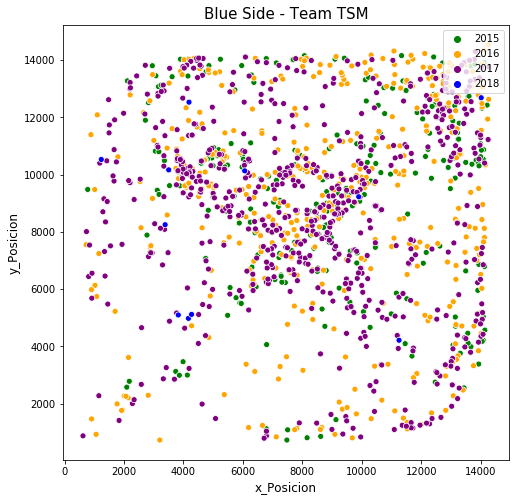

In [67]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=b_tsm['x_pos'].values, y=b_tsm['y_pos'].values, hue=b_tsm['Year'].values, palette=['green','orange','purple','blue'])
plt.ylabel('y_Posicion', fontsize=12)
plt.xlabel('x_Posicion', fontsize=12)
plt.title('Blue Side - Team TSM', fontsize=15)
plt.legend(loc='upper right', ncol=1)
plt.show()

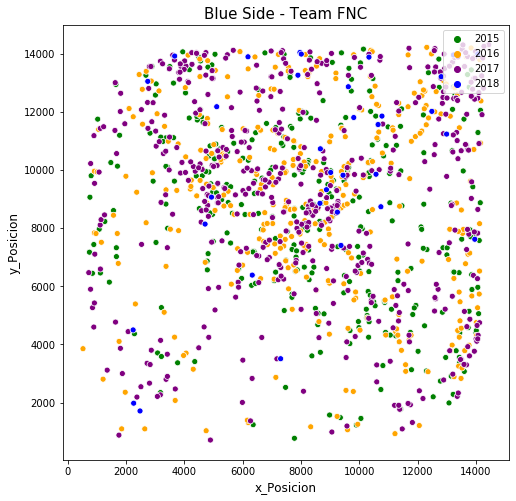

In [68]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=b_fnc['x_pos'].values, y=b_fnc['y_pos'].values, hue=b_fnc['Year'].values, palette=['green','orange','purple','blue'])
plt.ylabel('y_Posicion', fontsize=12)
plt.xlabel('x_Posicion', fontsize=12)
plt.title('Blue Side - Team FNC', fontsize=15)
plt.legend(loc='upper right', ncol=1)
plt.show()

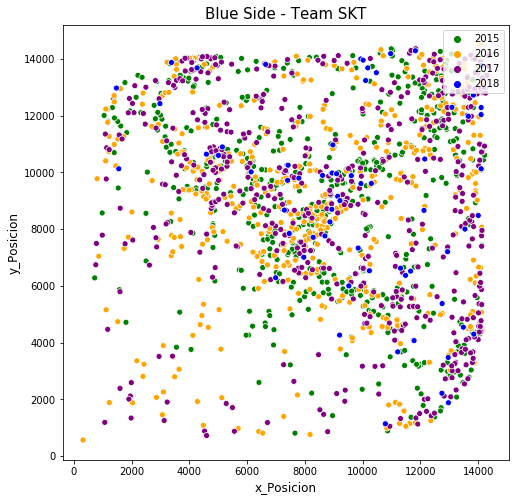

In [69]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=b_skt['x_pos'].values, y=b_skt['y_pos'].values, hue=b_skt['Year'].values, palette=['green','orange','purple','blue'])
plt.ylabel('y_Posicion', fontsize=12)
plt.xlabel('x_Posicion', fontsize=12)
plt.title('Blue Side - Team SKT', fontsize=15)
plt.legend(loc='upper right', ncol=1)
plt.show()

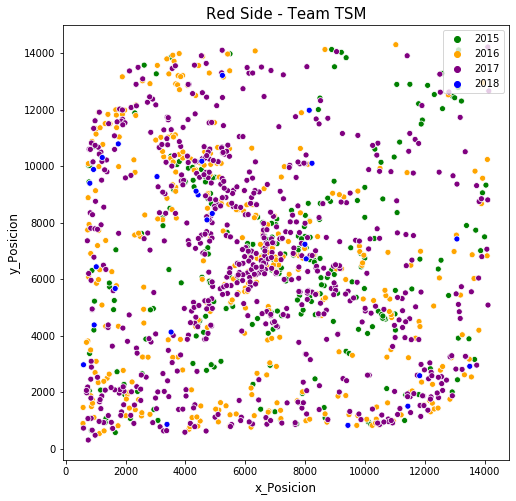

In [73]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=r_tsm['x_pos'].values, y=r_tsm['y_pos'].values, hue=r_tsm['Year'].values, palette=['green','orange','purple','blue'])
plt.ylabel('y_Posicion', fontsize=12)
plt.xlabel('x_Posicion', fontsize=12)
plt.title('Red Side - Team TSM', fontsize=15)
plt.legend(loc='upper right', ncol=1)
plt.show()

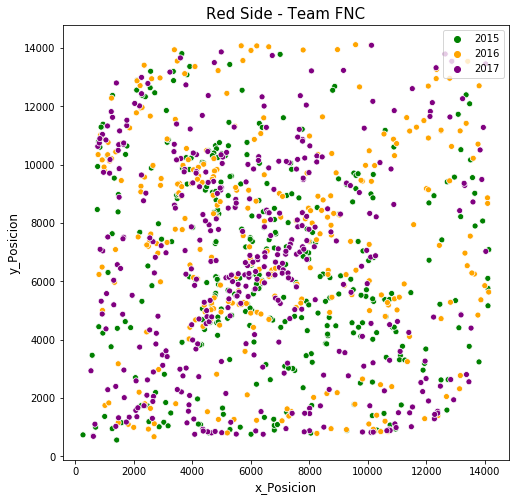

In [74]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=r_fnc['x_pos'].values, y=r_fnc['y_pos'].values, hue=r_fnc['Year'].values, palette=['green','orange','purple'])
plt.ylabel('y_Posicion', fontsize=12)
plt.xlabel('x_Posicion', fontsize=12)
plt.title('Red Side - Team FNC', fontsize=15)
plt.legend(loc='upper right', ncol=1)
plt.show()

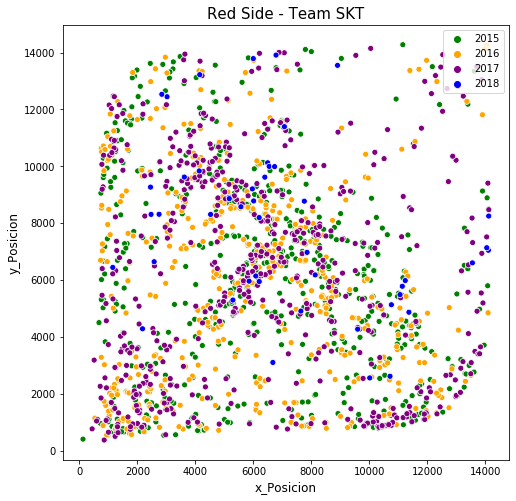

In [75]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=r_skt['x_pos'].values, y=r_skt['y_pos'].values, hue=r_skt['Year'].values, palette=['green','orange','purple','blue'])
plt.ylabel('y_Posicion', fontsize=12)
plt.xlabel('x_Posicion', fontsize=12)
plt.title('Red Side - Team SKT', fontsize=15)
plt.legend(loc='upper right', ncol=1)
plt.show()

# Monsters

El juego tiene monstruos que brindan mejoras a los jugadores. Estos monstruos son fuertes y por lo general se matan en equipo cuando se cuenta con algún tipo de ventaja (hay jugadores muertos en el equipo enemigo o se encuentran lejos). Un indicador del dominio de un equipo en el juego es qué tan frecuentemente logran matar a uno de estos monstruos.

Los datos de los monstruos asesinados se encuentran en el archivo **monsters.csv**, el cual contiene los siguientes campos:

* **Address**: Identificador único de la partida
* **Team**: Identificador del equipo (blue o red).
* **Time**: Minuto en que se mató al monstruo.
* **Type**: Tipo de monstruo. En este ejercicio nos enfocaremos en los dragones.

## Ejercicio 6.
### Obtener el equipo con mayor número de dragones asesinados antes del minuto 30 por *Year*, *Season* y *League*.

El resultado debe ser similar a lo siguiente:  

| Year   | Season | League | TeamTag    | Dragones |
|--------|------  |--------|------------|----------|
| 2015   | Spring | EULCS  | SK         |    49    |

In [82]:
monsters_info = pd.merge(info, monsters, how='left', on='Address')

In [83]:
monsters_info = monsters_info[['League', 'Year', 'Season', 'blueTeamTag', 'redTeamTag', 'Team', 'Time', 'Type_y']]

In [84]:
dragons = monsters_info.query("Type_y == 'DRAGON'").copy()

In [85]:
dragons_blue = dragons.query("Team == 'bDragons'").copy()
dragons_red = dragons.query("Team == 'rDragons'").copy()

In [87]:
dragons_blue.drop(columns=['redTeamTag', 'Team'], inplace=True)
dragons_red.drop(columns=['blueTeamTag', 'Team'], inplace=True)

In [88]:
dragons_blue.rename(columns={'blueTeamTag':'TeamTag','Type_y':'Type', }, inplace=True)
dragons_red.rename(columns={'redTeamTag':'TeamTag','Type_y':'Type', }, inplace=True)

In [89]:
dragons_full =pd.concat([dragons_blue, dragons_red])
dragons_full.reset_index(drop=True, inplace=True)

In [90]:
dragons_time30 = dragons_full.query("Time < 30").copy()

In [91]:
def my_agg_6(x):
    names = {
        'Dragons': x['Type'].count()
    }
    return pd.Series(names, index=['Dragons'])

In [92]:
dragons_time30['Type'] = 1
dragons_time30['Type'] = dragons_time30['Type'].astype(int)

In [93]:
dragons_time30 = dragons_time30.groupby(['Year','Season','League','TeamTag']).apply(my_agg_6)

In [94]:
dragons_time30

Dragons
Year Season League TeamTag         
2015 Spring EULCS  CW            28
                   EL            26
                   FNC           32
                   GIA           24
                   GMB           27
...                             ...
2016 Spring NALCS  NRG           27
                   REN           18
                   TIP           23
                   TL            30
                   TSM           24

[91 rows x 1 columns]

In [95]:
dragons_time30.reset_index(inplace=True)

In [96]:
dragons_time30

,Year,Season,League,TeamTag,Dragons
0,2015,Spring,EULCS,CW,28
1,2015,Spring,EULCS,EL,26
2,2015,Spring,EULCS,FNC,32
3,2015,Spring,EULCS,GIA,24
4,2015,Spring,EULCS,GMB,27
...,...,...,...,...,...
86,2016,Spring,NALCS,NRG,27
87,2016,Spring,NALCS,REN,18
88,2016,Spring,NALCS,TIP,23
89,2016,Spring,NALCS,TL,30


In [97]:
# Comprobación
dragons_time30.query("TeamTag == 'SK' and Season == 'Spring'")

,Year,Season,League,TeamTag,Dragons
8,2015,Spring,EULCS,SK,49


# Structures

Las estructuras defienden las bases, la mayoría son torretas que atacan a los enemigos. Un indicador del ritmo de juego es que tan frecuentemente se destruyen torretas enemigas en etapas tempranas del juego.

Los datos de las estructuras destruidas se encuentran en el archivo **structures.csv**, el cual contiene los siguientes campos:

* **Address**: Identificador único de la partida
* **Team**: Identificador del equipo (blue o red).
* **Time**: Minuto en que se destruyó la estructura.
* **Lane**: Carril en que se encontraba la estructura.
* **Type**: Tipo de estructura.

## Ejercicio 7.
### Obtener la proporción de partidas en que se destruyó la primera torre (*OUTER_TURRET*) del carril central (*MID_LANE*) antes del minuto 15 por *Year*, *Season* y *League*.

El resultado debe ser similar a lo siguiente:  

| Year   | Season | League | Proporción |
|--------|------  |--------|------------|
| 2015   | Spring | EULCS  | 0.250000   |